### Naive Bayes

In [19]:
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data[:, :] # we can select individual features
y = iris.target

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [21]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [22]:
clf.class_prior_ # prior probabilities for the three classes
clf.var_ # variance of each feature, with respect to each class
clf.theta_ # mean of each feature, with respect to each class

array([[4.9972973 , 3.38918919, 1.45405405, 0.24054054],
       [5.91764706, 2.75882353, 4.19117647, 1.30882353],
       [6.66341463, 2.9902439 , 5.58292683, 2.03902439]])

In [23]:
from matplotlib.colors import ListedColormap
import numpy as np

clf = GaussianNB()
clf.fit(X_train[:,:2], y_train)

GaussianNB()

In [24]:
x_set, y_set = X_train[:,:2], y_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = 
x_set[:, 0].max() + 1, step = 0.01),
 np.arange(start = x_set[:, 1].min() - 1, stop = 
x_set[:, 1].max() + 1, step = 0.01))

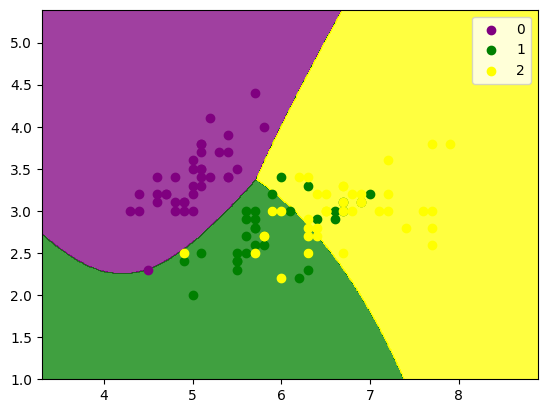

In [25]:
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).
reshape(X1.shape),
 alpha = 0.75, cmap = ListedColormap(('purple', 'green', 
'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
 plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
 color = ListedColormap(('purple', 'green', 'yellow'))(i), 
label = j)
plt.legend()
plt.show()

### Support Vector Machines

In [26]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df['target'] = iris.target
X = df.iloc[:,:2]
y = df.iloc[:,5]

In [27]:
svc = svm.SVC(kernel='linear', C=1.0).fit(X, y)

In [28]:
support_vector_indices = svc.support_
print(len(support_vector_indices))
support_vectors_per_class = svc.n_support_
print(support_vectors_per_class)

81
[ 8 39 34]


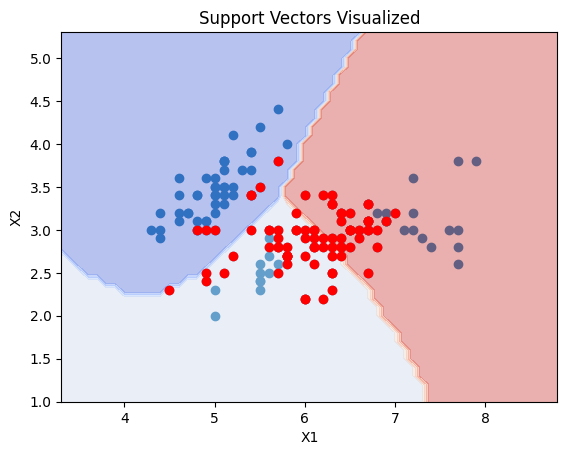

In [29]:
support_vectors = svc.support_vectors_
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Visualize support vectors
plt.scatter(X.iloc[:,0], X.iloc[:,1])
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Support Vectors Visualized')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [30]:
X = df.iloc[:100,:2]
y = df.iloc[:100,5]

from sklearn import svm
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


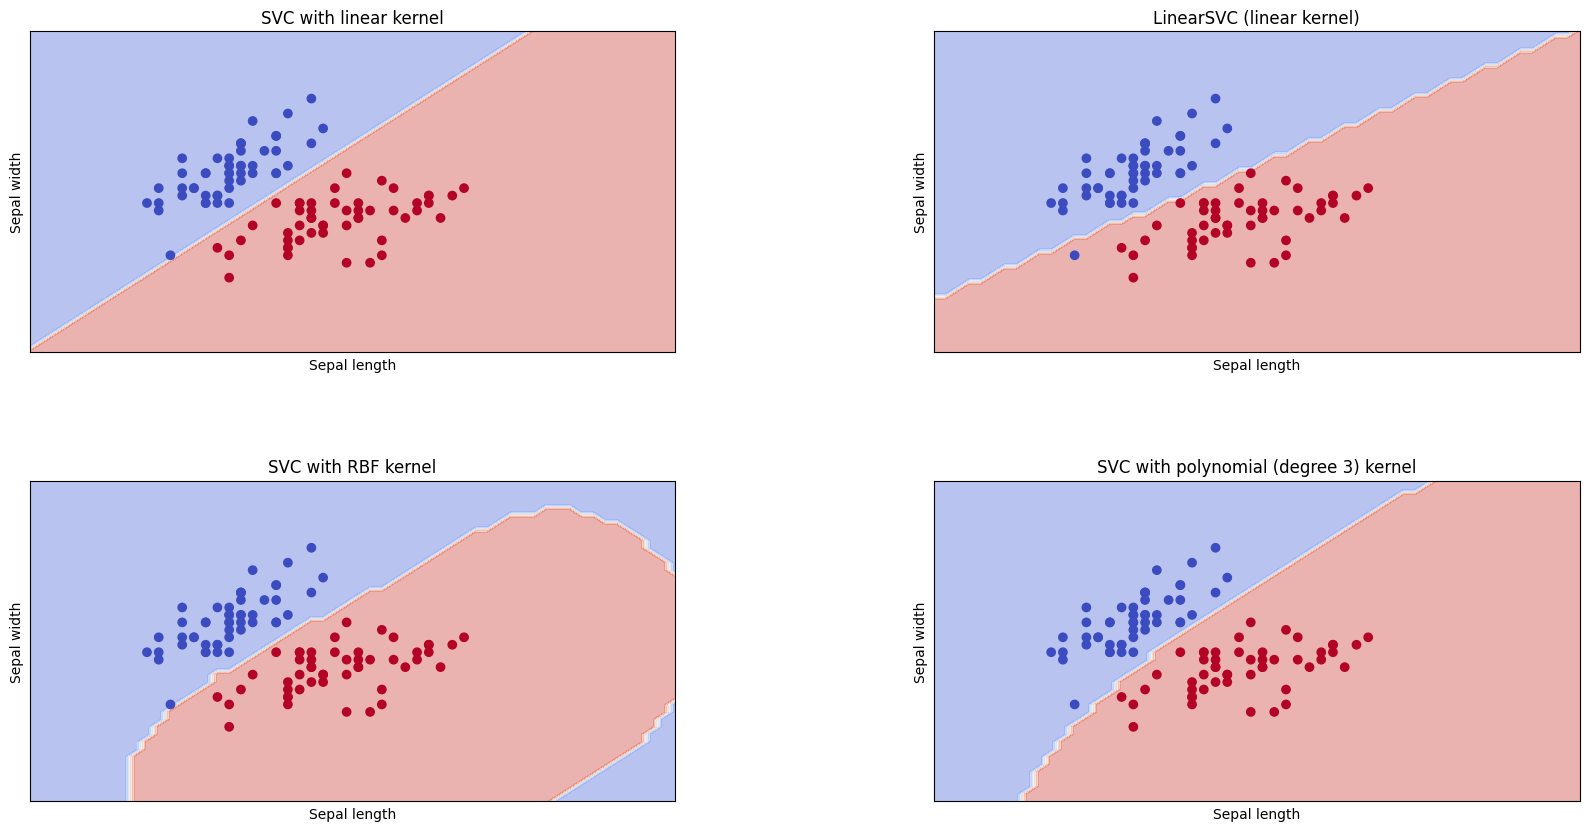

In [31]:
titles = ['SVC with linear kernel',
 'LinearSVC (linear kernel)',
 'SVC with RBF kernel',
 'SVC with polynomial (degree 3) kernel']
xx,yy = np.meshgrid( np.arange(x_min, x_max, 0.1), np.arange(y_min, 
y_max, 0.1) )
plt.figure(figsize=(20,10))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
 plt.subplot(2, 2, i + 1)
 plt.subplots_adjust(wspace=0.4, hspace=0.4)
 Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 # Put the result into a color plot
 Z = Z.reshape(xx.shape)
 plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
 # Plot also the training points
 plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm)
 plt.xlabel('Sepal length')
 plt.ylabel('Sepal width')
 plt.xlim(xx.min(), xx.max())
 plt.ylim(yy.min(), yy.max())
 plt.xticks(())
 plt.yticks(())
 plt.title(titles[i])
plt.show()